# Chanyoung Park(AIT-580_Final)
- Cleaning ,Processing, Visualization 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
netflix_data = pd.read_csv('C:/Users/cytim/OneDrive/바탕 화면/STAT 515/netflix_titles.csv')


## Cleaning

In [2]:
# Handling missing values
# Filling 'director', 'cast', 'country', 'rating' with 'Unknown'
fill_unknown = ['director', 'cast', 'country', 'rating']
for col in fill_unknown:
    netflix_data[col].fillna('Unknown', inplace=True)

# Dropping rows where 'date_added' is missing
netflix_data.dropna(subset=['date_added'], inplace=True)

# Filling 'duration' with its mode
duration_mode = netflix_data['duration'].mode()[0]
netflix_data['duration'].fillna(duration_mode, inplace=True)

# Data Consistency and Data Types
# Converting 'date_added' to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Now, the dataset is cleaned and ready for use


## transformation and calculated columns

In [3]:
# Apply the function to extract the year
netflix_data['added_year'] = netflix_data['date_added'].dt.year

# Convert 'added_year' to a proper integer type
netflix_data['added_year'] = netflix_data['added_year'].astype(int)

# Calculate the 'add_release_gap' and define 'relativity'
netflix_data['add_release_gap'] = netflix_data['added_year'] - netflix_data['release_year']
netflix_data['relativity'] = netflix_data['add_release_gap'].apply(
    lambda x: 'produced within 2 years' if x <= 2 else 'produced more than 2 years ago')


# Group by 'added_year' and 'relativity', and count the occurrences
relativity_yearly_count = netflix_data.groupby(['added_year', 'relativity']).size().reset_index(name='count')


# Example: Group by 'type' and 'added_year', and count the occurrences
type_yearly_count = netflix_data.groupby(['type', 'added_year']).size().reset_index(name='count')

In [4]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,add_release_gap,relativity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,1,produced within 2 years
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,0,produced within 2 years
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,0,produced within 2 years


In [5]:
# Saving the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_netflix_titles.csv'  # Specify your desired file path and name
netflix_data.to_csv(cleaned_file_path, index=False)

print("Dataset saved to:", cleaned_file_path)


Dataset saved to: cleaned_netflix_titles.csv


In [6]:
cleaned_netflix_data = pd.read_csv('C:/Users/cytim/OneDrive/바탕 화면/AIT 580/cleaned_netflix_titles.csv')

## Content Type Distribution:

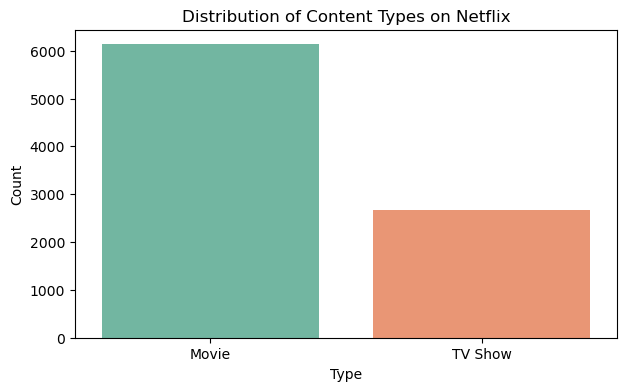

In [7]:
# Distribution of Movies vs. TV Shows
content_type_distribution = cleaned_netflix_data['type'].value_counts()

# Plotting
plt.figure(figsize=(7, 4))
sns.barplot(x=content_type_distribution.index, y=content_type_distribution.values, palette="Set2")
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Yearly and montly contents update visualization

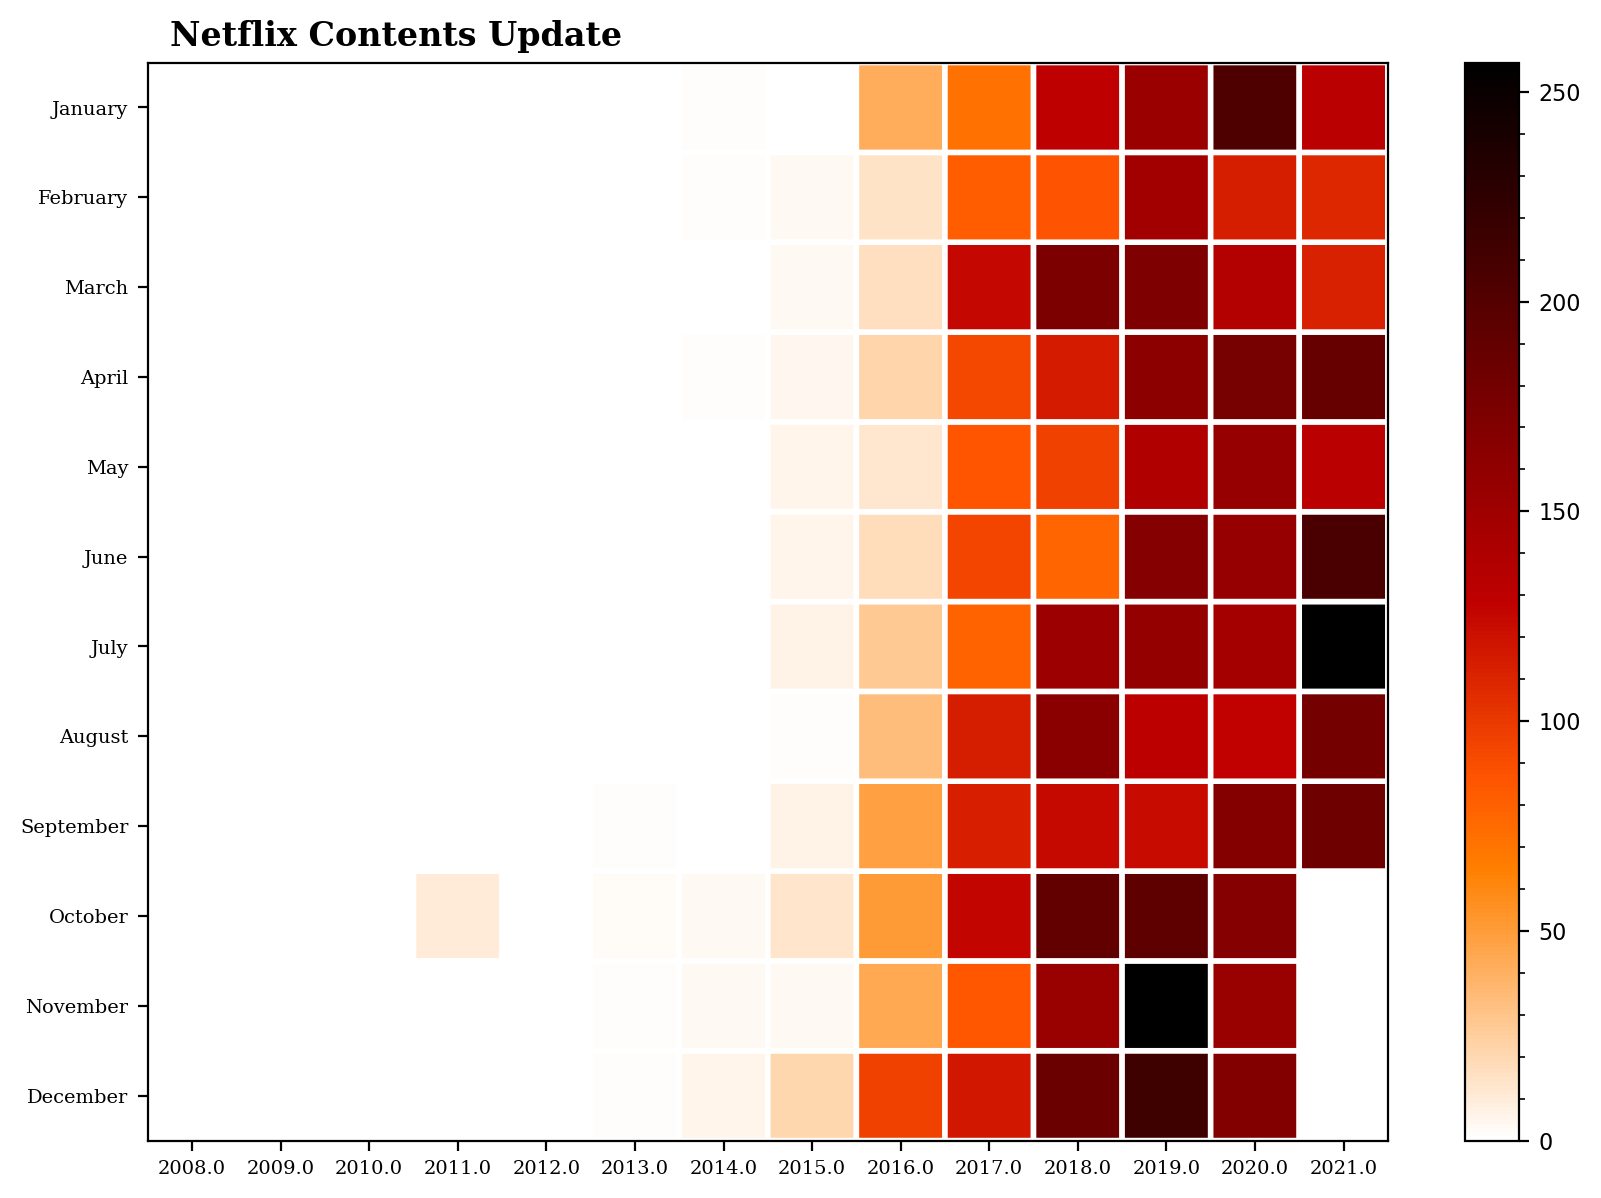

In [9]:
# Extract month and year from 'date_added'
netflix_data['year'] = pd.to_datetime(cleaned_netflix_data['date_added'], errors='coerce').dt.year
netflix_data['month'] = pd.to_datetime(cleaned_netflix_data['date_added'], errors='coerce').dt.month_name()

# Grouping by year and counting occurrences of each month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]
grouped_data = netflix_data.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Creating the heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(grouped_data, cmap='gist_heat_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(grouped_data.columns), 1), grouped_data.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(grouped_data.index), 1), grouped_data.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

## Top 10 Genres on Netflix:

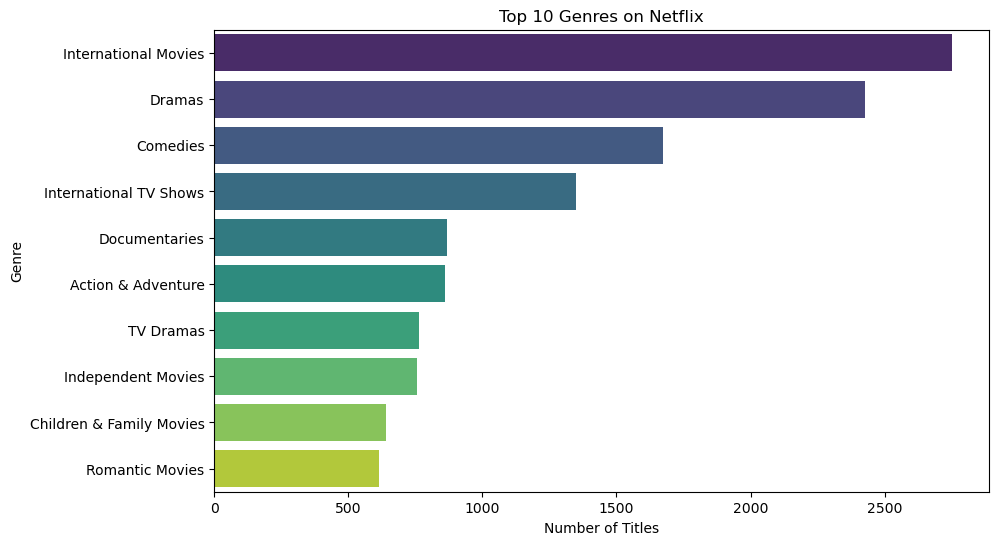

In [10]:
# Genre Analysis
genre_list = cleaned_netflix_data['listed_in'].str.split(', ').explode()
genre_distribution = genre_list.value_counts()

# Plotting the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_distribution.head(10).values, y=genre_distribution.head(10).index, palette="viridis")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


## Top 10 Countries Producing Netflix Content:

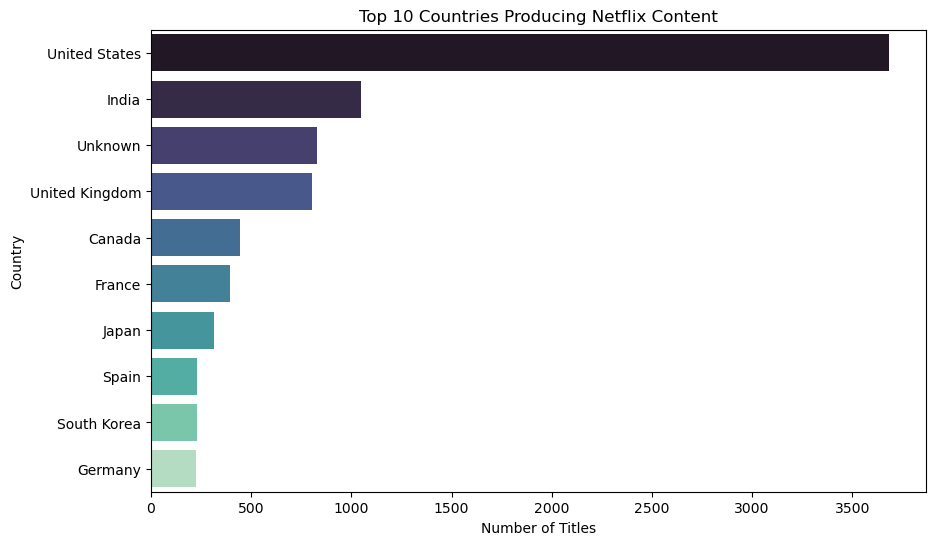

In [11]:
# Country-Specific Analysis
country_list = cleaned_netflix_data['country'].str.split(', ').explode()
country_distribution = country_list.value_counts()

# Plotting the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.head(10).values, y=country_distribution.head(10).index, palette="mako")
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

## Genre popularity by top 5 countries:

C:\Users\cytim\AppData\Local\Temp\ipykernel_37616\2020022372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['listed_in'] = filtered_data['listed_in'].str.split(', ')
C:\Users\cytim\AppData\Local\Temp\ipykernel_37616\2020022372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['country'] = filtered_data['country'].str.split(', ')


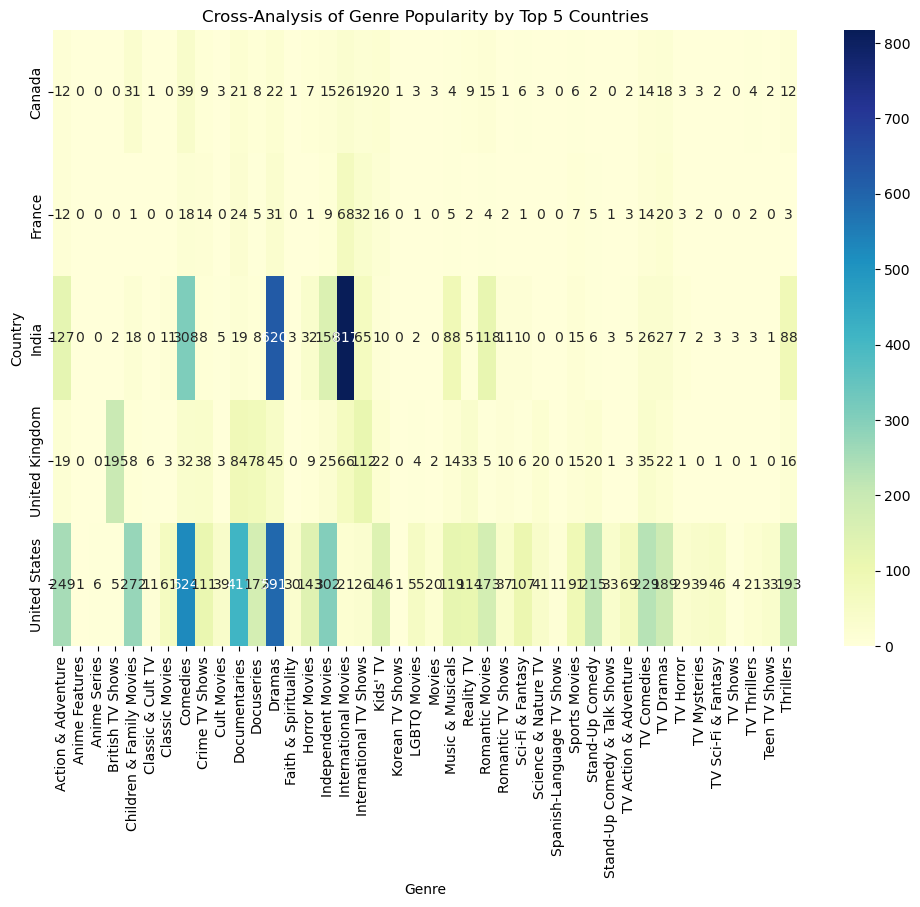

In [12]:
# Filtering the dataset for the top 5 content-producing countries
top_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France']
filtered_data = cleaned_netflix_data[cleaned_netflix_data['country'].isin(top_countries)]

# Splitting the 'listed_in' and 'country' columns for detailed analysis
filtered_data['listed_in'] = filtered_data['listed_in'].str.split(', ')
filtered_data['country'] = filtered_data['country'].str.split(', ')
exploded_data = filtered_data.explode('listed_in').explode('country')

# Focusing on top countries and genres
genre_by_country = exploded_data[exploded_data['country'].isin(top_countries)].groupby(['country', 'listed_in']).size().unstack().fillna(0)

# Visualizing the genre popularity by country
plt.figure(figsize=(12, 8))
sns.heatmap(genre_by_country, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Cross-Analysis of Genre Popularity by Top 5 Countries')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()

## Distribution of Content Ratings on Netflix:

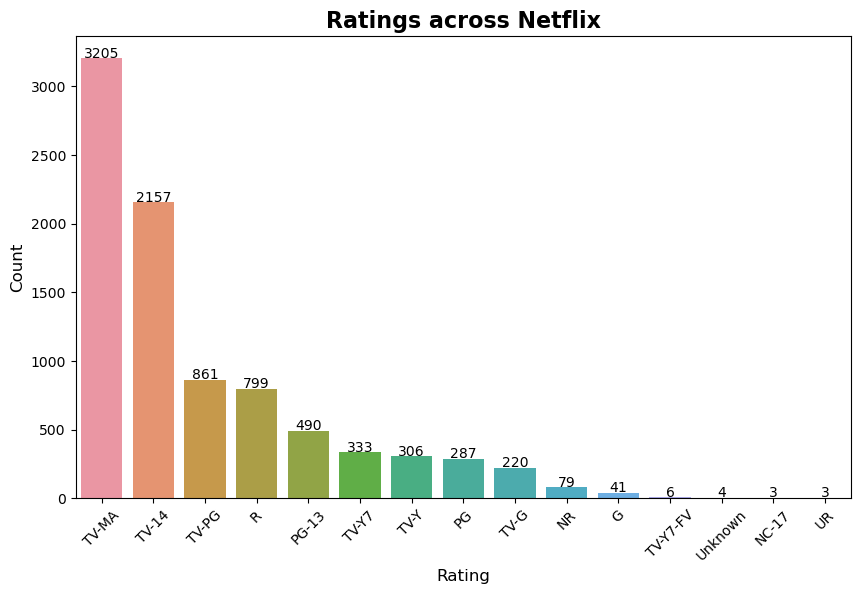

In [13]:
# Exclude rows where 'rating' is '74 min', '84 min', or '66 min' from the corrected dataset
filtered_data = cleaned_netflix_data[~cleaned_netflix_data['rating'].isin(['74 min', '84 min', '66 min'])]

# Count and sort the ratings
ratings_count_ordered = filtered_data['rating'].value_counts().sort_values(ascending=False)

# Plotting with the filtered data and ordered ratings
plt.figure(figsize=(10, 6), dpi=100)  # Standard figsize and dpi
graph = sns.barplot(x=ratings_count_ordered.index, y=ratings_count_ordered.values)

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Ratings across Netflix', fontsize=16, weight='semibold')
plt.xticks(rotation=45)

# Adding count above each bar
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 5, int(height), ha='center', fontsize=10)

# Displaying the plot
plt.show()